In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import yfinance as yf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score, cross_validate
import math
from numpy import mean, std, sqrt
#from pycaret.regression import *
import torch
import torch.nn as nn
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
time_start = datetime.now()

In [ ]:
## setting the start and end date
start_date = '2000-01-01'
end_date = datetime.today()

In [ ]:
# Define the currency pair symbol for GBP to BDT
currency_pair = 'GBPBDT=X'
# Fetch exchange rate data from Yahoo Finance
data = yf.download(currency_pair, start=start_date, end=end_date)
data = data.reset_index()
# Display the fetched data
print(data)

[*********************100%%**********************]  1 of 1 completed

           Date        Open        High         Low       Close   Adj Close  \
0    2005-08-11  117.792847  118.646698  117.639801  118.296951  118.296951   
1    2005-08-12  118.424652  119.007004  118.366302  118.837151  118.837151   
2    2005-08-15  119.118050  119.219200  118.437103  118.508499  118.508499   
3    2005-08-16  117.548950  117.955200  117.305496  117.646500  117.646500   
4    2005-08-17  117.513199  118.373497  117.383499  118.061096  118.061096   
...         ...         ...         ...         ...         ...         ...   
4242 2024-04-23  133.398239  133.580063  133.398239  133.202164  133.202164   
4243 2024-04-24  133.944458  134.421112  133.944458  133.580063  133.580063   
4244 2024-04-25  134.482162  135.168228  134.482162  134.421112  134.421112   
4245 2024-04-26  135.102844  135.207779  135.102844  135.168228  135.168228   
4246 2024-04-29  135.478745  135.507248  135.426346  135.222763  135.222763   

      Volume  
0          0  
1          0  
2     

In [ ]:
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,4247,4247.000000,4247.000000,4247.000000,4247.000000,4247.000000,4247.0
mean,2016-02-21 19:44:00.452083712,114.762197,114.967294,114.553219,114.741038,114.741038,0.0
min,2005-08-11 00:00:00,92.207001,92.207001,91.541000,91.512001,91.512001,0.0
25%,2012-02-09 12:00:00,107.437737,107.591637,107.162220,107.405003,107.405003,0.0
50%,2016-03-07 00:00:00,113.868378,114.048286,113.599998,113.830002,113.830002,0.0
75%,2020-04-02 12:00:00,121.620712,121.920002,121.340202,121.500000,121.500000,0.0
max,2024-04-29 00:00:00,140.264313,140.484711,140.166031,140.511795,140.511795,0.0
std,NaN,10.480472,10.471792,10.479858,10.464220,10.464220,0.0


In [ ]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

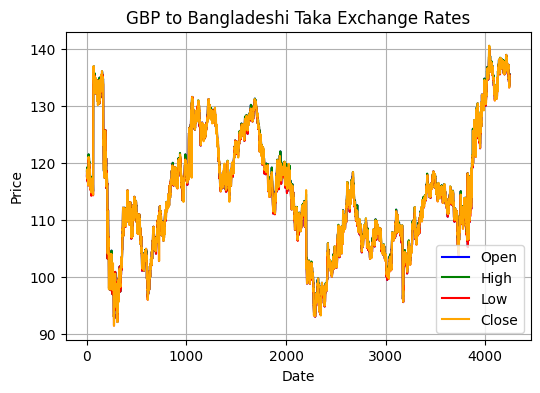

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(data.index, data['Open'], label='Open', color='blue')
plt.plot(data.index, data['High'], label='High', color='green')
plt.plot(data.index, data['Low'], label='Low', color='red')
plt.plot(data.index, data['Close'], label='Close', color='orange')

plt.title('GBP to Bangladeshi Taka Exchange Rates')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

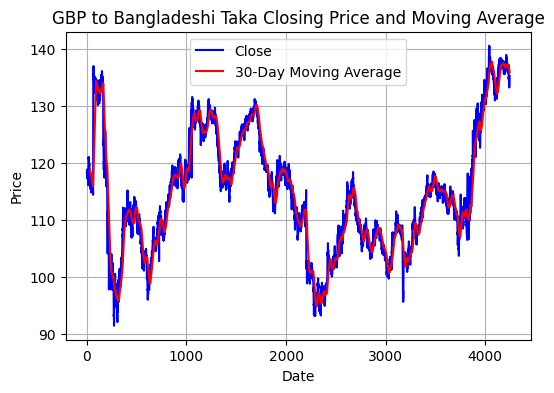

In [ ]:
# Calculate 30-day moving average
data['MA_30'] = data['Close'].rolling(window=30).mean()
# Plotting the closing price and moving average
plt.figure(figsize=(6, 4))
plt.plot(data.index, data['Close'], label='Close', color='blue')
plt.plot(data.index, data['MA_30'], label='30-Day Moving Average', color='red')
plt.title('GBP to Bangladeshi Taka Closing Price and Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

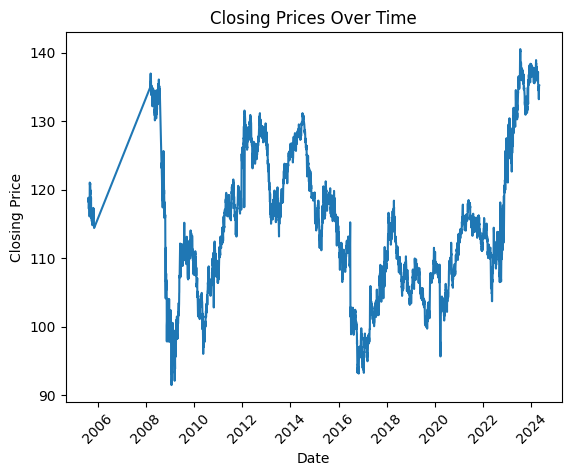

In [ ]:
data = data.reset_index()
# Plotting the closing prices
plt.plot(data['Date'] ,data['Close'])
plt.title("Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
#plt.xticks([])
plt.xticks(rotation=45)
plt.savefig('GBP to BANGTAKA closing price')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
# Define feature dataset
feature_data_set = data
# Split the data into training, testing, and validation sets
train_data, test_val_data = train_test_split(feature_data_set, test_size=0.2, random_state=42)
test_data, validation_data = train_test_split(test_val_data, test_size=0.5, random_state=42)
# Print the shapes of the split sets
print(train_data.shape, validation_data.shape, test_data.shape)


(3397, 9) (425, 9) (425, 9)


In [ ]:
# Extract 'Adj Close' column for training data
train_data_set = train_data['Adj Close'].values.reshape(-1, 1)

# Extract 'Adj Close' column for test data
test_data_set = test_data['Adj Close'].values.reshape(-1, 1)

# Extract 'Adj Close' column for validation data
validation_data_set = validation_data['Adj Close'].values.reshape(-1, 1)

# Print the shapes of the extracted datasets
print(train_data_set.shape, test_data_set.shape, validation_data_set.shape)


(3397, 1) (425, 1) (425, 1)


In [ ]:
## scaling of data
scaler = MinMaxScaler()
Scaled_train_data_set = scaler.fit_transform(train_data_set)
Scaled_val_data_set = scaler.fit_transform(validation_data_set)
Scaled_test_data_set = scaler.fit_transform(test_data_set)

In [ ]:
# Define the step index
step_index = 30
# Initialize lists to store X_train and y_train
X_train = []
y_train = []
# Iterate through the training data to create sequences
for index in range(len(train_data_set) - step_index):
    X_train.append(train_data_set[index:index + step_index, 0])
    y_train.append(train_data_set[step_index + index, 0])
# Convert lists to NumPy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the input data to match deep learning models
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

# Print the reshaped data
print(X_train.shape, y_train.shape)

(3367, 30, 1) (3367, 1)


In [ ]:
## data spliting into x and y validate
X_Val = []
y_Val = []

for index in range(len(validation_data)-step_index):
    X_Val.append(Scaled_val_data_set[index : index + step_index, 0])
    y_Val.append(Scaled_val_data_set[step_index + index, 0])

X_Val, y_Val = np.array(X_Val), np.array(y_Val)

# Covert to NumPy array
X_Val = np.array(X_Val)
y_Val = np.array(y_Val)

# Reshaped input data to match with deep learning model
y_Val = y_Val.reshape(y_Val.shape[0] , 1)
X_Val = np.reshape(X_Val, (X_Val.shape[0], X_Val.shape[1], 1))

# Print the reshaped data
print(X_Val.shape, y_Val.shape)

(395, 30, 1) (395, 1)


In [ ]:
# Initialize lists to store X_test and y_test
X_test = []
y_test = []

# Iterate through the test data to create sequences
for index in range(len(test_data_set) - step_index):
    X_test.append(test_data_set[index : index + step_index, 0])
    y_test.append(test_data_set[step_index + index, 0])

# Convert lists to NumPy arrays
X_test, y_test = np.array(X_test), np.array(y_test)

# Reshape the input data to match the LSTM input shape [samples, timesteps, features]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_test = np.reshape(y_test, (y_test.shape[0], 1))

# Print the reshaped data
print(X_test.shape, y_test.shape)


(395, 30, 1) (395, 1)


In [ ]:
def root_mean_square_error(y_true, y_pred):
    """
    Calculate Root Mean Square Error (RMSE).

    Parameters:
        y_true (array-like): The ground truth (actual) values.
        y_pred (array-like): The predicted values.

    Returns:
        float: The root mean square error (RMSE) value.
    """
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def mean_absolute_percentage_error(y_true, y_pred):
    """
    Calculate Mean Absolute Percentage Error (MAPE).

    Parameters:
        y_true (array-like): The ground truth (actual) values.
        y_pred (array-like): The predicted values.

    Returns:
        float: The mean absolute percentage error (MAPE) value.
    """
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mean_square_error(y_true, y_pred):
    """
    Calculate Mean Square Error (MSE).

    Parameters:
        y_true (array-like): The ground truth (actual) values.
        y_pred (array-like): The predicted values.

    Returns:
        float: The mean square error (MSE) value.
    """
    return np.mean((y_true - y_pred) ** 2)


Epoch 1/30
95/95 [==============================] - 6s 32ms/step - loss: 81654.2656 - val_loss: 18618.1426
Epoch 2/30
95/95 [==============================] - 3s 29ms/step - loss: 4764.0718 - val_loss: 540.6256
Epoch 3/30
95/95 [==============================] - 3s 28ms/step - loss: 926.0094 - val_loss: 1781.7496
Epoch 4/30
95/95 [==============================] - 4s 37ms/step - loss: 18431.0195 - val_loss: 11827.7793
Epoch 5/30
95/95 [==============================] - 3s 30ms/step - loss: 86907992.0000 - val_loss: 1538234.3750
Epoch 6/30
95/95 [==============================] - 3s 28ms/step - loss: 73788.0078 - val_loss: 262.0016
Epoch 7/30
95/95 [==============================] - 3s 29ms/step - loss: 204.7096 - val_loss: 231.4801
Epoch 8/30
95/95 [==============================] - 3s 31ms/step - loss: 190.9278 - val_loss: 222.1026
Epoch 9/30
95/95 [==============================] - 3s 36ms/step - loss: 181.0656 - val_loss: 217.7913
Epoch 10/30
95/95 [==============================] -

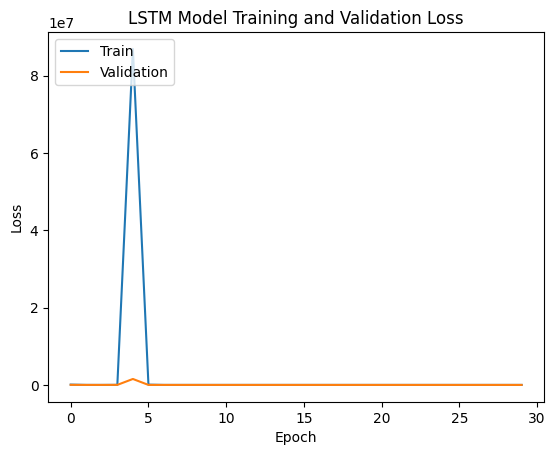

In [ ]:
# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(step_index, 1)))
model_lstm.add(LSTM(units=64, activation='relu', return_sequences=False))
model_lstm.add(Dense(units=1))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
LSTM_model = model_lstm.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1)

# Plot training and validation loss
plt.plot(LSTM_model.history['loss'])
plt.plot(LSTM_model.history['val_loss'])
plt.title('LSTM Model Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Make predictions using the LSTM model
lstm_predictions = model_lstm.predict(X_Val)

# Inverse transform the scaled predictions to the original scale
lstm_predictions_scale_original = scaler.inverse_transform(lstm_predictions)

# Inverse transform the scaled validation target values to the original scale
y_val_scale_original = scaler.inverse_transform(y_Val)


13/13 [==============================] - 0s 10ms/step


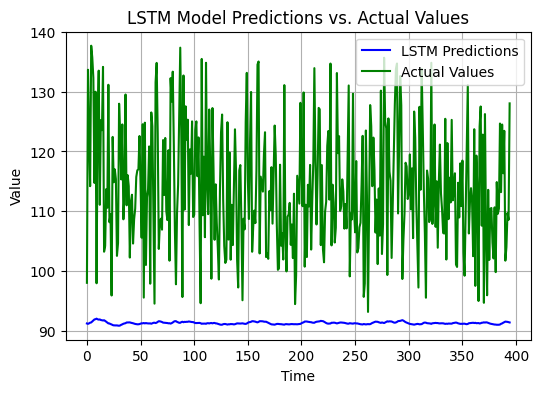

In [ ]:
# Define the range for x-axis
x = range(len(lstm_predictions_scale_original))

# Plotting the predictions and actual values
plt.figure(figsize=(6, 4))
plt.plot(x, lstm_predictions_scale_original, label='LSTM Predictions', color='blue')
plt.plot(x, y_val_scale_original, label='Actual Values', color='green')

plt.title('LSTM Model Predictions vs. Actual Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Calculate MAPE for LSTM model
mape_val_lstm = mean_absolute_percentage_error(y_val_scale_original, lstm_predictions_scale_original)

# Calculate MSE for LSTM model
mse_val_lstm = mean_square_error(y_val_scale_original, lstm_predictions_scale_original)

# Calculate RMSE for LSTM model
rmse_val_lstm = root_mean_square_error(y_val_scale_original, lstm_predictions_scale_original)

# Print LSTM model performance during validation phase
print('LSTM model performance during validation phase')
print("LSTM_RMSE:", rmse_val_lstm)
print("LSTM_MSE:", mse_val_lstm)
print("LSTM_MAPE:", mape_val_lstm)


LSTM model performance during validation phase
LSTM_RMSE: 24.854256154155003
LSTM_MSE: 617.7340489763518
LSTM_MAPE: 19.26365663999534


## LSTM MODEL TESTING

In [ ]:
# Predict on the test data using the LSTM model
lstm_predictions = model_lstm.predict(X_test)

# Inverse transform the scaled predictions to the original scale
lstm_predictions_scale_original = scaler.inverse_transform(lstm_predictions)

# Inverse transform the scaled test target values to the original scale
y_test_scale_original = scaler.inverse_transform(y_test)


13/13 [==============================] - 0s 9ms/step


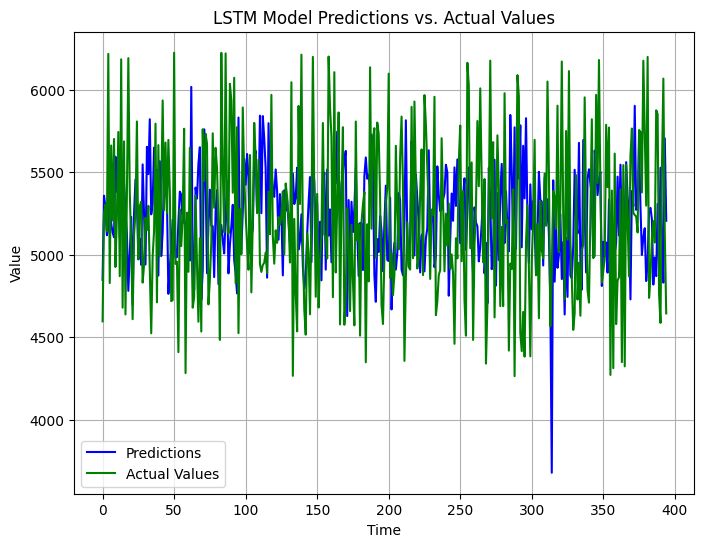

In [ ]:
# Define the range for x-axis
x = range(len(lstm_predictions_scale_original))

# Plotting the predictions and actual values
plt.figure(figsize=(8, 6))
plt.plot(x, lstm_predictions_scale_original, label='Predictions', color='blue')
plt.plot(x, y_test_scale_original, label='Actual Values', color='green')

plt.title('LSTM Model Predictions vs. Actual Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Calculate MSE for LSTM model during testing phase
mse_test_lstm = mean_square_error(y_test_scale_original, lstm_predictions_scale_original)

# Calculate RMSE for LSTM model during testing phase
rmse_test_lstm = root_mean_square_error(y_test_scale_original, lstm_predictions_scale_original)

# Calculate MAPE for LSTM model during testing phase
mape_test_lstm = mean_absolute_percentage_error(y_test_scale_original, lstm_predictions_scale_original)

# Print LSTM model performance during testing phase
print('LSTM model performance during testing phase')
print("LSTM MSE:", mse_test_lstm)
print("LSTM RMSE:", rmse_test_lstm)
print("LSTM MAPE:", mape_test_lstm)


LSTM model performance during testing phase
LSTM MSE: 301583.74212665646
LSTM RMSE: 549.1664065897116
LSTM MAPE: 8.56641804528555


In [ ]:
lstm_predictions_scale_original

array([[4847.4746],
       [5357.    ],
       [5288.358 ],
       [5117.9146],
       [5154.7783],
       [5443.464 ],
       [5189.762 ],
       [5134.4404],
       [5105.913 ],
       [5593.0825],
       [5380.049 ],
       [5477.1875],
       [5104.231 ],
       [5298.3135],
       [5420.4307],
       [5426.182 ],
       [5264.3423],
       [5125.901 ],
       [4780.8354],
       [4997.3467],
       [5228.7476],
       [4695.967 ],
       [5250.414 ],
       [5455.653 ],
       [5314.842 ],
       [4971.662 ],
       [5094.738 ],
       [4938.6694],
       [5546.804 ],
       [5251.8296],
       [4940.8945],
       [5653.2476],
       [5488.0444],
       [5820.4287],
       [5244.424 ],
       [5313.62  ],
       [5648.831 ],
       [5485.5674],
       [5514.366 ],
       [4873.684 ],
       [5566.2964],
       [4992.305 ],
       [5135.536 ],
       [5506.234 ],
       [5381.2773],
       [5334.6094],
       [4763.0327],
       [4930.1685],
       [5032.744 ],
       [5211.1875],


In [ ]:
import datetime
num_future_days = 14

lastest_date = pd.to_datetime(data['Date'].iat[-1])

# Generate the list of dates for forecast
next_14_days = [lastest_date + datetime.timedelta(days=i) for i in range(1, num_future_days + 1)]

# Print the predicted rates for the next month
for date, price in zip(next_14_days[:14], lstm_predictions_scale_original[-14:]):
    print(f"{date.date()}: {price}")

2024-04-30: [4956.1587]
2024-05-01: [5266.19]
2024-05-02: [5283.7734]
2024-05-03: [5213.2695]
2024-05-04: [4819.205]
2024-05-05: [4983.2256]
2024-05-06: [4870.246]
2024-05-07: [5308.1113]
2024-05-08: [4904.0786]
2024-05-09: [5526.6826]
2024-05-10: [5112.6226]
2024-05-11: [4830.8604]
2024-05-12: [5704.745]
2024-05-13: [5205.493]


## sentimental analysis effect on crude oil price

In [ ]:
# Simulating loading the first DataFrame (Stock Market Data)
data_stock = {
    'Date': ['2005-08-11', '2005-08-12', '2005-08-15', '2005-08-16', '2005-08-17'],
    'Open': [117.792847, 118.424652, 119.118050, 117.548950, 117.513199],
    'High': [118.646698, 119.007004, 119.219200, 117.955200, 118.373497],
    'Low': [117.639801, 118.366302, 118.437103, 117.305496, 117.383499],
    'Close': [118.296951, 118.837151, 118.508499, 117.646500, 118.061096],
    'Adj Close': [118.296951, 118.837151, 118.508499, 117.646500, 118.061096],
    'Volume': [0, 0, 0, 0, 0]
}
df_stock = pd.DataFrame(data_stock)
df_stock['Date'] = pd.to_datetime(df_stock['Date'])  # Ensuring Date is datetime dtype

# Simulating loading the second DataFrame (Social Media Sentiment Data)
data_sentiment = {
    'ID': [2401, 2401, 2401, 2401, 2401],
    'Game': ['Borderlands', 'Borderlands', 'Borderlands', 'Borderlands', 'Borderlands'],
    'Sentiment': ['Positive', 'Positive', 'Positive', 'Positive', 'Positive'],
    'Text': [
        "im getting on borderlands and i will murder you all",
        "I am coming to the borders and I will kill you...",
        "im getting on borderlands and i will kill you",
        "im coming on borderlands and i will murder you",
        "im getting on borderlands 2 and i will murder you"
    ]
}
df_sentiment = pd.DataFrame(data_sentiment)


In [ ]:
# Simple mapping of ID to Date for demonstration
id_to_date = {
    2401: '2005-08-11',
    # Add more mappings as needed
}
df_sentiment['Date'] = df_sentiment['ID'].map(id_to_date)
df_sentiment['Date'] = pd.to_datetime(df_sentiment['Date'])

# Merging dataframes on the Date column
merged_df = pd.merge(df_stock, df_sentiment, on='Date', how='inner')
print(merged_df)


        Date        Open        High         Low       Close   Adj Close  \
0 2005-08-11  117.792847  118.646698  117.639801  118.296951  118.296951   
1 2005-08-11  117.792847  118.646698  117.639801  118.296951  118.296951   
2 2005-08-11  117.792847  118.646698  117.639801  118.296951  118.296951   
3 2005-08-11  117.792847  118.646698  117.639801  118.296951  118.296951   
4 2005-08-11  117.792847  118.646698  117.639801  118.296951  118.296951   

   Volume    ID         Game Sentiment  \
0       0  2401  Borderlands  Positive   
1       0  2401  Borderlands  Positive   
2       0  2401  Borderlands  Positive   
3       0  2401  Borderlands  Positive   
4       0  2401  Borderlands  Positive   

                                                Text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you  
3     im coming on borderlands and i will murder you  
4  im getting o

In [ ]:
# Convert 'Date' column to datetime if not already
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
# Check data types and look for any anomalies
print(merged_df.dtypes)
print(merged_df.head())


Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
ID                    int64
Game                 object
Sentiment            object
Text                 object
dtype: object
        Date        Open        High         Low       Close   Adj Close  \
0 2005-08-11  117.792847  118.646698  117.639801  118.296951  118.296951   
1 2005-08-11  117.792847  118.646698  117.639801  118.296951  118.296951   
2 2005-08-11  117.792847  118.646698  117.639801  118.296951  118.296951   
3 2005-08-11  117.792847  118.646698  117.639801  118.296951  118.296951   
4 2005-08-11  117.792847  118.646698  117.639801  118.296951  118.296951   

   Volume    ID         Game Sentiment  \
0       0  2401  Borderlands  Positive   
1       0  2401  Borderlands  Positive   
2       0  2401  Borderlands  Positive   
3       0  2401  Borderlands  Positive   
4       0  

In [ ]:
# Example of assigning simple sentiment scores
merged_df['Sentiment Score'] = merged_df['Sentiment'].map({'Positive': 1, 'Negative': -1})


In [ ]:
# Calculate daily stock price changes
merged_df['Price Change'] = merged_df['Close'] - merged_df['Open']
# Aggregate sentiment scores by date
daily_sentiment = merged_df.groupby('Date')['Sentiment Score'].mean()
# Aggregate stock price changes by date
daily_price_change = merged_df.groupby('Date')['Price Change'].mean()
# Combine into a single DataFrame for analysis
analysis_df = pd.DataFrame({
    'Daily Sentiment': daily_sentiment,
    'Daily Price Change': daily_price_change
})


Correlation between daily sentiment and price change:                     Daily Sentiment  Daily Price Change
Daily Sentiment                 NaN                 NaN
Daily Price Change              NaN                 NaN


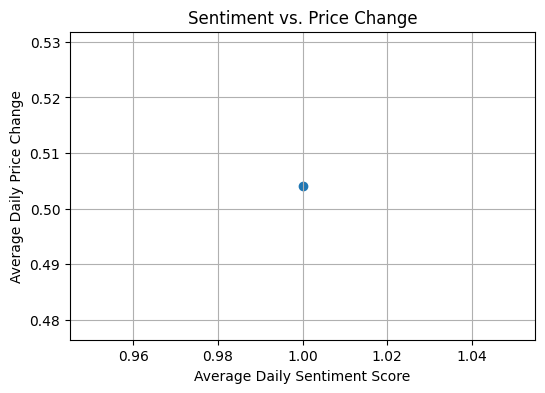

In [ ]:
# Calculate correlation
correlation = analysis_df.corr()
print("Correlation between daily sentiment and price change:", correlation)
# Plotting
plt.figure(figsize=(6, 4))
plt.scatter(analysis_df['Daily Sentiment'], analysis_df['Daily Price Change'])
plt.title('Sentiment vs. Price Change')
plt.xlabel('Average Daily Sentiment Score')
plt.ylabel('Average Daily Price Change')
plt.grid(True)
plt.show()
